<a href="https://colab.research.google.com/github/Thuku2/Computer-Vision/blob/main/COMPUTER_VISION_APPLICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import RandomRotation
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

In [28]:
#Load data
IMG_SIZE=(224,224)
BATCH_SIZE=32
DATA_DIR='/content/ai_computer_vision_dataset.csv'

In [29]:
#DISPLAY DATASET
df=pd.read_csv(DATA_DIR)
df.head()

,ID,Category,Image_ID,Equation,Solution_Steps,Sign_Language,Sign_Text,Sign_Translation,Anomaly_Type,Anomaly_Score,...,Confidence_Score,Bounding_Box_X,Bounding_Box_Y,Bounding_Box_Width,Bounding_Box_Height,Blur_Level,Brightness_Level,Contrast_Level,Noise_Level,Label
0,1,Handwritten Math Solutions,IMG_4409,Σ(n=1 to ∞) 1/n^2,8.0,NaN,NaN,NaN,NaN,NaN,...,0.91,8,230,148,142,0.847947,0.526016,0.156290,0.704046,Incorrect
1,2,Security Camera Anomalies,IMG_1098,NaN,NaN,NaN,NaN,NaN,Loitering,0.11,...,0.99,56,426,145,104,0.694596,0.889878,0.214328,0.193889,Uncertain
2,3,Multi-lingual Street Signs,IMG_4901,NaN,NaN,Spanish,Yield,Alto,NaN,NaN,...,0.96,185,472,184,163,0.328324,0.582424,0.652709,0.283442,Uncertain
3,4,Multi-lingual Street Signs,IMG_6509,NaN,NaN,English,No Entry,Alto,NaN,NaN,...,0.74,137,393,109,193,0.391975,0.090846,0.905870,0.960370,Uncertain
4,5,Handwritten Math Solutions,IMG_9244,x^2 + y^2 = 25,6.0,NaN,NaN,NaN,NaN,NaN,...,0.54,405,243,155,60,0.350489,0.708919,0.899651,0.619847,Uncertain


In [30]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Data type of train_images: uint8
Data type of test_images: uint8
Minimum pixel value in train_images: 0
Maximum pixel value in train_images: 255
Unique labels and their counts in train_labels:
Label 0: 5923
Label 1: 6742
Label 2: 5958
Label 3: 6131
Label 4: 5842
Label 5: 5421
Label 6: 5918
Label 7: 6265
Label 8: 5851
Label 9: 5949


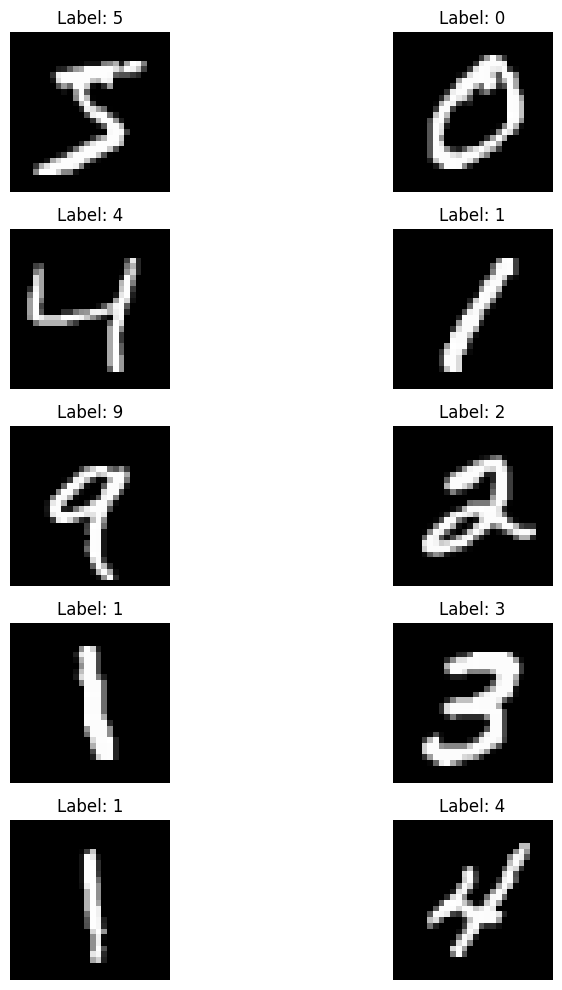

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Print the data type of the loaded image arrays
print(f"Data type of train_images: {train_images.dtype}")
print(f"Data type of test_images: {test_images.dtype}")

# 2. Print the minimum and maximum pixel values in train_images
print(f"Minimum pixel value in train_images: {np.min(train_images)}")
print(f"Maximum pixel value in train_images: {np.max(train_images)}")

# 3. Print the unique values and their counts in train_labels
unique_labels, counts = np.unique(train_labels, return_counts=True)
print("Unique labels and their counts in train_labels:")
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count}")

# 4. Display a few example images from the training set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
# Convert data type to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

print(f"Normalized and reshaped training images shape: {train_images.shape}")
print(f"Normalized and reshaped test images shape: {test_images.shape}")
print(f"Data type of train_images after preprocessing: {train_images.dtype}")
print(f"Minimum pixel value in train_images after preprocessing: {np.min(train_images)}")
print(f"Maximum pixel value in train_images after preprocessing: {np.max(train_images)}")

Normalized and reshaped training images shape: (60000, 28, 28, 1)
Normalized and reshaped test images shape: (10000, 28, 28, 1)
Data type of train_images after preprocessing: float32
Minimum pixel value in train_images after preprocessing: 0.0
Maximum pixel value in train_images after preprocessing: 1.0


In [33]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8881 - loss: 0.3607 - val_accuracy: 0.9783 - val_loss: 0.0666
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9842 - loss: 0.0482 - val_accuracy: 0.9859 - val_loss: 0.0517
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9886 - val_loss: 0.0438
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9861 - val_loss: 0.0460
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9900 - val_loss: 0.0366
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9881 - val_loss: 0.0453
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9902 - val_loss: 0.0403
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.9974 -